<a href="https://colab.research.google.com/github/Pavansai03/machine-learning/blob/main/GradientDescent_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples = 100,n_features = 2,n_informative = 1,n_redundant=0,n_classes = 2,n_clusters_per_class=1,random_state = 41,hypercube=False,class_sep=15)

In [47]:
x

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163],
       [-1.68155714,  0.15599044],
       [-2.64121606,  1.07782053],
       [ 0.2416527 ,  0.80626713],
       [-0.40266099,  0.74859527],
       [-2.80888854,  0.75152794],
       [-2.62743539, -0.90114581],
       [-2.62900445, -0.1815243 ],
       [ 0.13405049, -2.98092432],
       [ 0.96162631,  1.20500136],
       [-2.67615806,  0.78302407],
       [ 0.54329928,  0.42968688],
       [ 0.01490532, -0.73229726],
       [-2.72870533, -0.83930476],
       [-0.02633711,  0.83727062],
       [-2.61974125, -0.10255323],
       [-3.1257262 ,  0.65867001],
       [-2.91434094,  0.92649819],
       [-2.16605143,  0.10216193],
       [ 1.76642459,  0.46886454],
       [-2.06564986,  0.45432938],
       [ 0.7699643 ,  1.8613386 ],
       [-2.63675549, -0.79255991],
       [-1.89063753, -1.0004391 ],
       [-3.24982176,

In [5]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

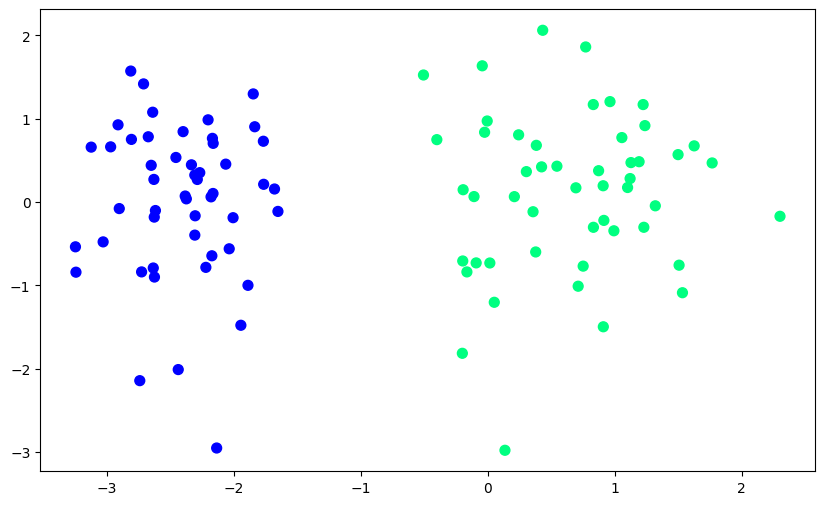

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c = y,cmap ="winter",s = 50)

In [59]:
#loss_function = (1/n)sum(max(0,-y[i]*f(x[i])))
#f(x[i]) = w1x[i]+w2x[i]+b
def perceptron(x,y):
  epochs = 1000
  lr = 0.1
  w1 = w2 = b = 1
  for i in range(epochs):
    for j in range(x.shape[0]):
      z = w1*x[j][0]+w2*x[j][1]+b
      curr = y[j]*z
      if curr < 0:
        w1 = w1+lr*y[j]*x[j][0]  #d/dw1 = {0 if y[i]*f(x[i]) > 0,
                                 #        -y[i]*x[i][0]  if y[i]*f(x[i]) < 0 }
        w2 = w2+lr*y[j]*x[j][1]  #d/dw2 = {0 if y[i]*f(x[i]) > 0,
                                 #        -y[i]*x[i][1] if y[i]*f(x[i]) < 0}
        b = b + lr*y[j]          #d/db = {-y[i] if y[i]*f(x[i]) < 0}
  return b,w1,w2


In [50]:
b,w1,w2 = perceptron(x,y)
print(f"w1 is {w1}, w1 is {w2},b is {b}")

w1 is 1.006638570722407, w1 is 0.22215119727529098,b is 1.3000000000000003


(-5.0, 2.0)

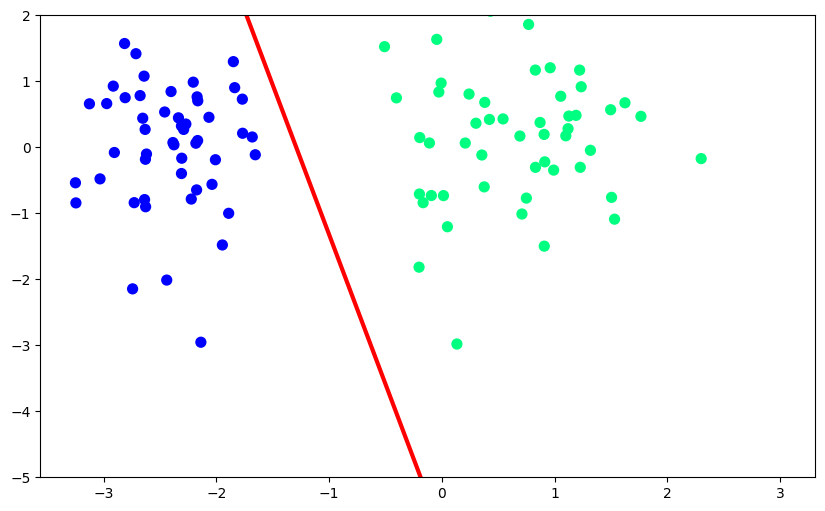

In [58]:

m = -(w1/w2)
c = -(b/w2)
x_input = np.linspace(-3,3,100)
y_input = m*x_input+c
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color = "red",linewidth = 3)
plt.scatter(x[:,0],x[:,1],c = y,cmap ="winter",s = 50)
plt.ylim(-5,2)
